In [21]:
import pandas as pd,numpy as np,warnings,matplotlib.pyplot as plt,statsmodels.api as sm
import seaborn as sns,tensorflow as tf,xgboost as xg
from scipy.stats import pearsonr
from math import sqrt
from scipy import stats 
from sklearn import datasets ,svm,linear_model,metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.datasets import make_classification,make_regression,make_hastie_10_2 
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler as mms,RobustScaler
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense,Activation
from tensorflow.keras import layers
from tensorflow import keras
warnings.simplefilter("ignore")

In [22]:
data=pd.read_excel(r"C:\Users\sudarson.SUDARSON\Desktop\imarticus\14 USL K Means Clustering\K-means\K-means\Dataset\cust_data.xlsx")
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [24]:
col=data.columns
col

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [25]:
data["Gender"].fillna(data["Gender"].mode().max(),inplace=True)

In [26]:
data.Gender.unique()

array(['M', 'F'], dtype=object)

In [27]:
data["Gender"]=data.Gender.replace("M",1).replace("F",0)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Cust_ID                 30000 non-null  int64
 1   Gender                  30000 non-null  int64
 2   Orders                  30000 non-null  int64
 3   Jordan                  30000 non-null  int64
 4   Gatorade                30000 non-null  int64
 5   Samsung                 30000 non-null  int64
 6   Asus                    30000 non-null  int64
 7   Udis                    30000 non-null  int64
 8   Mondelez International  30000 non-null  int64
 9   Wrangler                30000 non-null  int64
 10  Vans                    30000 non-null  int64
 11  Fila                    30000 non-null  int64
 12  Brooks                  30000 non-null  int64
 13  H&M                     30000 non-null  int64
 14  Dairy Queen             30000 non-null  int64
 15  Fendi              

In [29]:
scaled_df = StandardScaler().fit_transform(data)

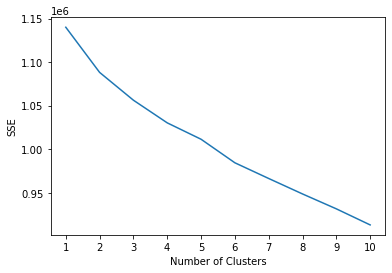

In [30]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# KMeans Clusturing

In [31]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=1, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_



array([0, 0, 0, ..., 0, 0, 0])

In [32]:
#append cluster assingments to original DataFrame
data['cluster'] = kmeans.labels_

#view updated DataFrame
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


def ReadData(fileName):
 
    # Read the file, splitting by lines
    f = open(fileName, 'r');
    lines = f.read().splitlines();
    f.close();
 
    items = [];
 
    for i in range(1, len(lines)):
        line = lines[i].split(',');
        itemFeatures = [];
 
        for j in range(len(line)-1):
             
            # Convert feature value to float
            v = float(line[j]);
             
            # Add feature value to dict
            itemFeatures.append(v);
 
        items.append(itemFeatures);
 
    shuffle(items);
 
    return items;


def FindColMinMax(items):
    n = len(items[0]);
    minima = [sys.maxint for i in range(n)];
    maxima = [-sys.maxint -1 for i in range(n)];
     
    for item in items:
        for f in range(len(item)):
            if (item[f] < minima[f]):
                minima[f] = item[f];
             
            if (item[f] > maxima[f]):
                maxima[f] = item[f];
 
    return minima,maxima;


def InitializeMeans(items, k, cMin, cMax):
 
    # Initialize means to random numbers between
    # the min and max of each column/feature   
    f = len(items[0]); # number of features
    means = [[0 for i in range(f)] for j in range(k)];
     
    for mean in means:
        for i in range(len(mean)):
 
            # Set value to a random float
            # (adding +-1 to avoid a wide placement of a mean)
            mean[i] = uniform(cMin[i]+1, cMax[i]-1);
 
    return means;

def EuclideanDistance(x, y):
    S = 0; # The sum of the squared differences of the elements
    for i in range(len(x)):
        S += math.pow(x[i]-y[i], 2)
 
    #The square root of the sum
    return math.sqrt(S)


def UpdateMean(n,mean,item):
    for i in range(len(mean)):
        m = mean[i];
        m = (m*(n-1)+item[i])/float(n);
        mean[i] = round(m, 3);
     
    return mean;


def Classify(means,item):
 
    # Classify item to the mean with minimum distance   
    minimum = sys.maxint;
    index = -1;
 
    for i in range(len(means)):
 
        # Find distance from item to mean
        dis = EuclideanDistance(item, means[i]);
 
        if (dis < minimum):
            minimum = dis;
            index = i;
     
    return index;

def CalculateMeans(k,items,maxIterations=100000):

	# Find the minima and maxima for columns
	cMin, cMax = FindColMinMax(items);
	
	# Initialize means at random points
	means = InitializeMeans(items,k,cMin,cMax);
	
	# Initialize clusters, the array to hold
	# the number of items in a class
	clusterSizes= [0 for i in range(len(means))];

	# An array to hold the cluster an item is in
	belongsTo = [0 for i in range(len(items))];

	# Calculate means
	for e in range(maxIterations):

		# If no change of cluster occurs, halt
		noChange = True;
		for i in range(len(items)):

			item = items[i];

			# Classify item into a cluster and update the
			# corresponding means.	
			index = Classify(means,item);

			clusterSizes[index] += 1;
			cSize = clusterSizes[index];
			means[index] = UpdateMean(cSize,means[index],item);

			# Item changed cluster
			if(index != belongsTo[i]):
				noChange = False;

			belongsTo[i] = index;

		# Nothing changed, return
		if (noChange):
			break;

	return means;



def FindClusters(means,items):
    clusters = [[] for i in range(len(means))]; # Init clusters
     
    for item in items:
 
        # Classify item into a cluster
        index = Classify(means,item);
 
        # Add item to cluster
        clusters[index].append(item);
 
    return clusters;

def CutToTwoFeatures(items,indexA,indexB):
    n = len(items);
    X = [];
    for i in range(n):
        item = items[i];
        newItem = [item[indexA],item[indexB]];
        X.append(newItem);

    return X;
        

def PlotClusters(clusters):
    n = len(clusters);
    #Cut down the items to two dimension and store to X
    X = [[] for i in range(n)];

    for i in range(n):
        cluster = clusters[i];
        for item in cluster:
            X[i].append(item);

    colors = ['r','b','g','c','m','y'];

    for x in X:
        #Choose color randomly from list, then remove it
        #(to avoid duplicates)
        c = choice(colors);
        colors.remove(c);

        Xa = [];
        Xb = [];

        for item in x:
            Xa.append(item[0]);
            Xb.append(item[1]);

        pyplot.plot(Xa,Xb,'o',color=c);

    pyplot.show();
        

def main():
    items = kMeans.ReadData('data.txt');
    items = CutToTwoFeatures(items,2,3);
    
    k = 3;
    means = kMeans.CalculateMeans(k,items);
    clusters = kMeans.FindClusters(means,items);
    
    PlotClusters(clusters);

main();

>>> from sklearn.cluster import KMeans
>>> import numpy as np
>>> X = np.array([[1, 2], [1, 4], [1, 0],
...               [10, 2], [10, 4], [10, 0]])
>>> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
>>> kmeans.labels_
array([1, 1, 1, 0, 0, 0], dtype=int32)
>>> kmeans.predict([[0, 0], [12, 3]])
array([1, 0], dtype=int32)
>>> kmeans.cluster_centers_
array([[10.,  2.],
       [ 1.,  2.]])